### Загрузка данных

In [165]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
#data1 = pd.DataFrame(iris.data, columns=iris.feature_names)
#data1.head()

In [35]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)','sepal width (cm)']]
data_class = iris.target
data.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


### Разделение данных на обучающую и тестовую выборки

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.35, random_state = 1984)

In [142]:
len(y_test)

53

### Модель LDA

In [143]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [144]:
# обучаем данные
lda = LinearDiscriminantAnalysis()

In [145]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [146]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 2, 2])

In [147]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [103]:
result

,0,1
0,1,2
1,2,1
2,2,2
3,1,1
4,0,0
5,2,2
6,2,2
7,1,1
8,1,1
9,0,1


In [148]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score

In [149]:
accuracy_score(y_test, lda.predict(X_test))

0.8301886792452831

In [150]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-6.48554786,  8.13868851],
       [ 2.39663261, -4.94441836],
       [ 4.75569027, -4.71153367]])

In [151]:
lda_small.means_

array([[5.06428571, 3.54285714],
       [6.66923077, 3.04615385]])

### Визуализация LDA

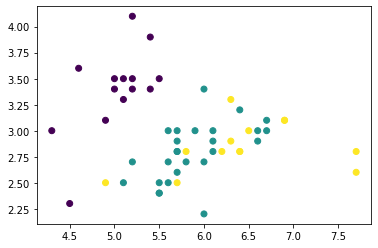

In [152]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=y_test)
plt.show()

In [153]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

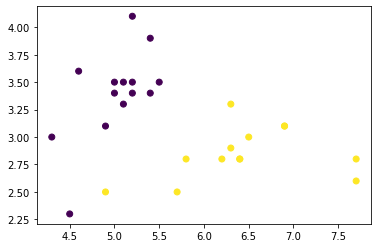

In [155]:
#Визуализация на тестовой выборке
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=sy_test)
plt.show()

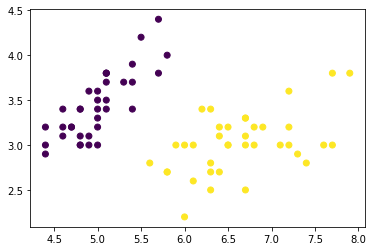

In [156]:
#Визуализация на обучающей выборке
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [157]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_test, sy_test)

LinearDiscriminantAnalysis()

In [158]:
# посмотрим на наши центроиды
lda_small.means_

array([[5.02857143, 3.39285714],
       [6.43846154, 2.84615385]])

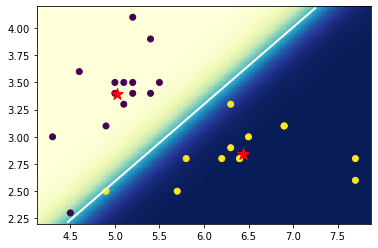

In [160]:
# сам scatter plot
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=sy_test)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='YlGnBu',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

### Кластеризация

In [162]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = pd.DataFrame(scaler.fit_transform(data), columns = ['sepal length (norm)', 'sepal width (norm)'])
iris_scaled['cluster'] = 1

<AxesSubplot:xlabel='sepal length (norm)', ylabel='sepal width (norm)'>

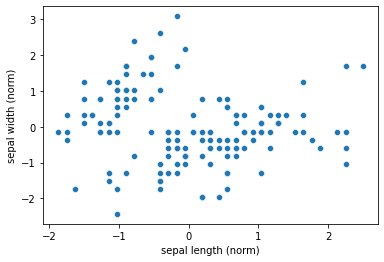

In [166]:
sns.scatterplot(data = iris_scaled, x = 'sepal length (norm)', y = 'sepal width (norm)')

In [169]:
from sklearn.cluster import KMeans
# строим график локтя
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

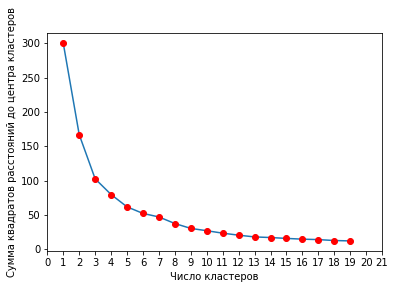

In [173]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xticks(range(0, 22, 1))
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний до центра кластеров')
plt.show()

Исходя из графика и объема выборки (малое кол-во объектов) оптимальное количеством кластеров можно считать 5. После 5-го кластера наблюдается слабое изменение суммы квадратов расстояний

<AxesSubplot:xlabel='sepal length (norm)', ylabel='sepal width (norm)'>

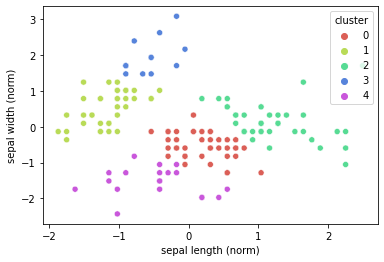

In [176]:
kmeans = KMeans(n_clusters = 5)
iris_scaled['cluster'] = kmeans.fit_predict(iris_scaled.iloc[:,[0,1]])
sns.scatterplot(data = iris_scaled, x = 'sepal length (norm)', y = 'sepal width (norm)', hue = 'cluster', cmap='autumn',
                palette = sns.color_palette("hls", 5))